In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

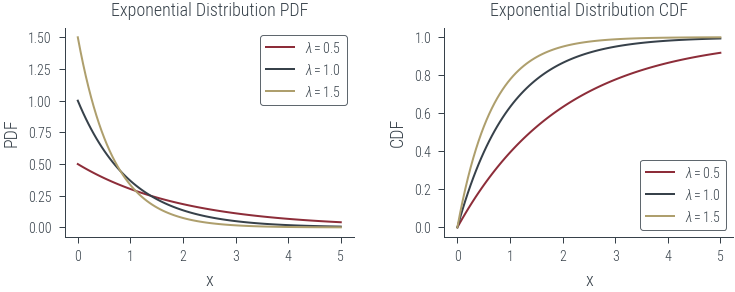

In [7]:
# Define values of lambda
lambdas = [0.5, 1.0, 1.5]
x = torch.linspace(0, 5, 100)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2,)

# Plot PDFs in the first subplot
for lam in lambdas:
    exponential_dist = torch.distributions.Exponential(rate=lam)
    pdf = exponential_dist.log_prob(x).exp()
    ax1.plot(x, pdf, label=f'$\lambda = {lam}$')

ax1.set_xlabel('x')
ax1.set_ylabel('PDF')
ax1.set_title('Exponential Distribution PDF')
ax1.legend()

# Plot CDFs in the second subplot
for lam in lambdas:
    exponential_dist = torch.distributions.Exponential(rate=lam)
    cdf = exponential_dist.cdf(x)
    ax2.plot(x, cdf, label=f'$\lambda = {lam}$')

ax2.set_xlabel('x')
ax2.set_ylabel('CDF')
ax2.set_title('Exponential Distribution CDF')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.savefig("../figures/sampling/exp-cdf.pdf")

In [31]:
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Create the exponential distribution





def plot_n_samples(n):
    exponential_dist = torch.distributions.Exponential(rate=1)
    x = torch.linspace(0, 5, 100)

    # Create the CDF plot
    fig, ax = plt.subplots()
    ax.set_xlabel('x')
    ax.set_ylabel('CDF')
    ax.set_title('Exponential Distribution CDF')

    # Initialize an empty line for the animated point
    point, = ax.plot([], [], 'ko', ms=5)
    # Draw the CDF curve
    cdf = exponential_dist.cdf(x)
    ax.plot(x, cdf, label='CDF', lw=2)
    torch.manual_seed(42)
    u = torch.rand(n)
    # Calculate the corresponding point on the CDF
    point_x = exponential_dist.icdf(u)
    point_y = u
    # Add the point to the plot
    point.set_data(point_x, point_y)

    # Add vertical and horizontal dashed lines
    ax.vlines(point_x, 0, point_y, linestyle='--', lw=1)
    ax.hlines(point_y, 0, point_x, linestyle='--', lw=1)
    plt.savefig(f"../figures/sampling/exp-cdf-samples-{n}.pdf")



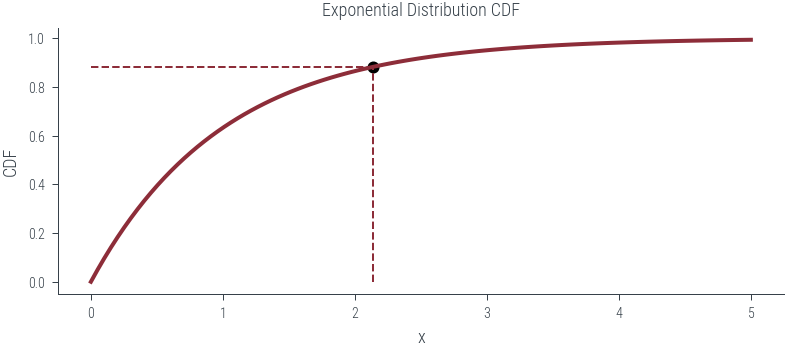

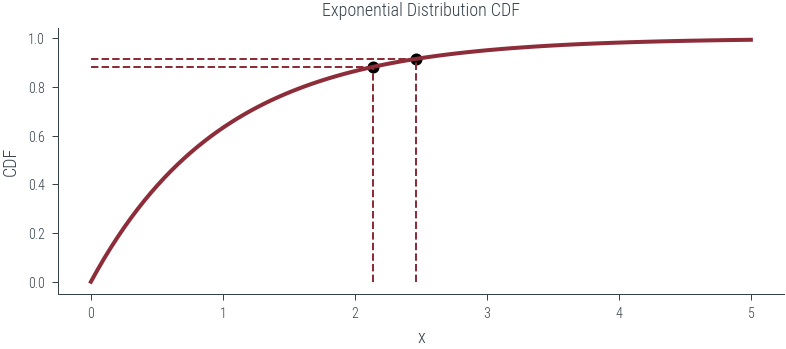

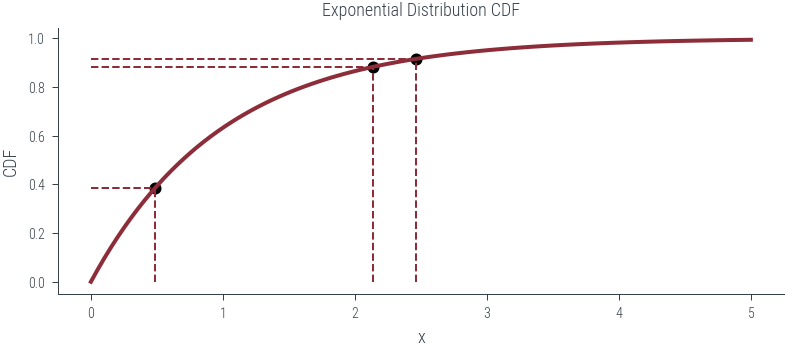

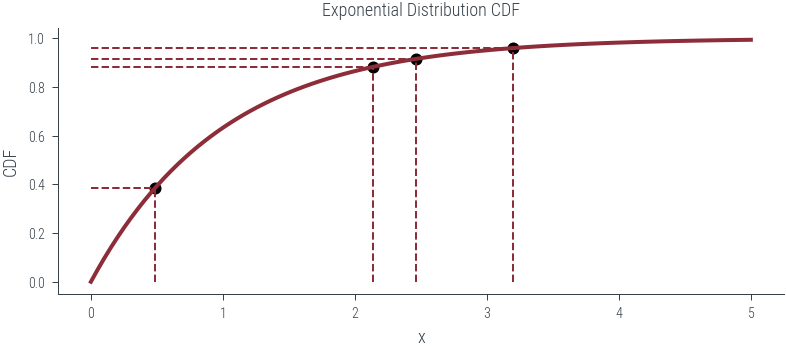

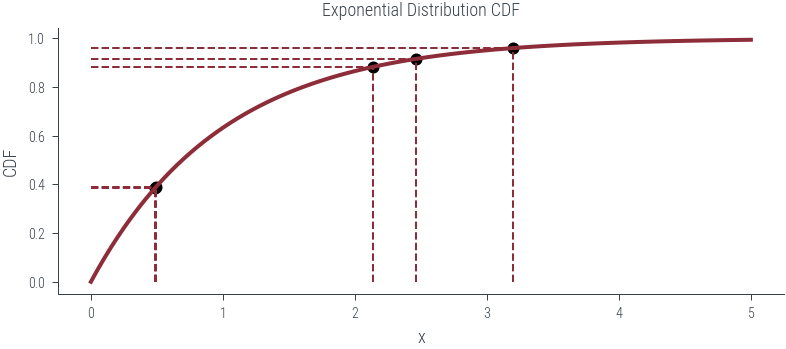

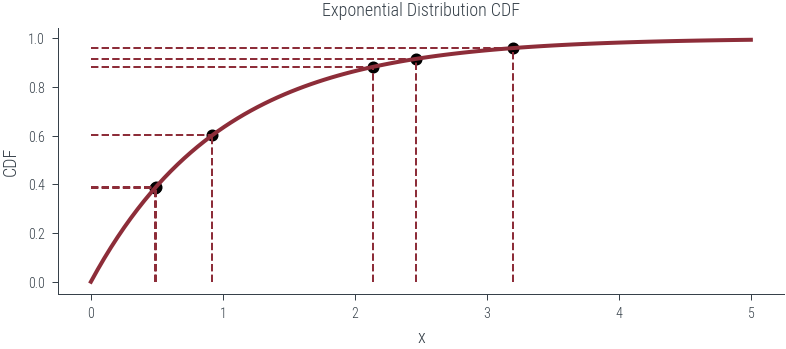

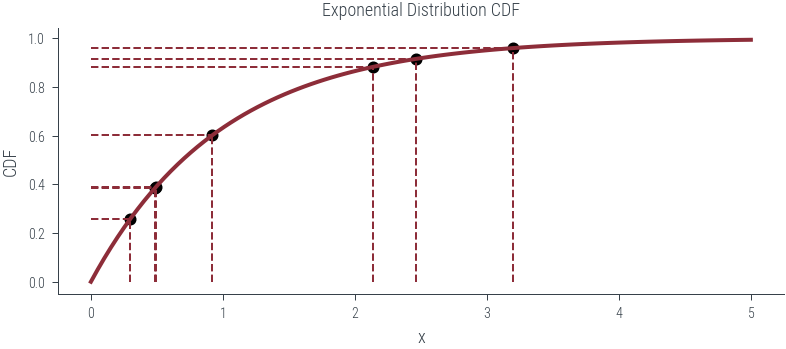

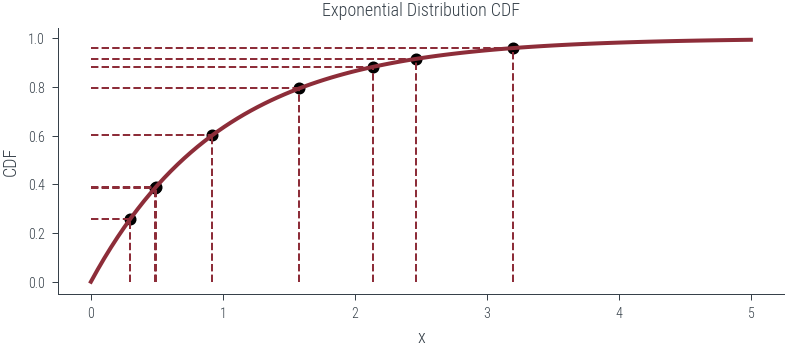

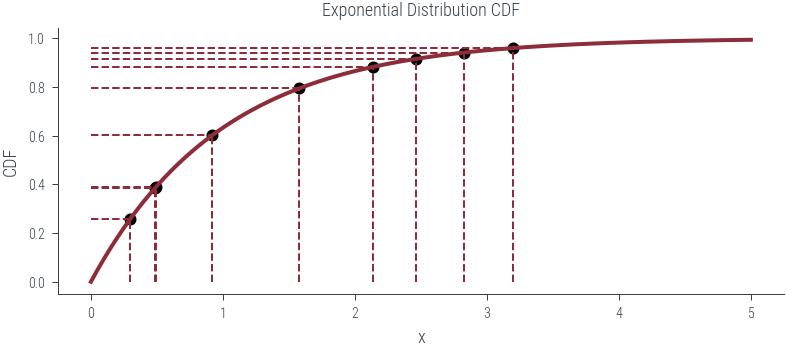

In [33]:
for i in range(1, 10):
    plot_n_samples(i)

(0.0, 5.0)

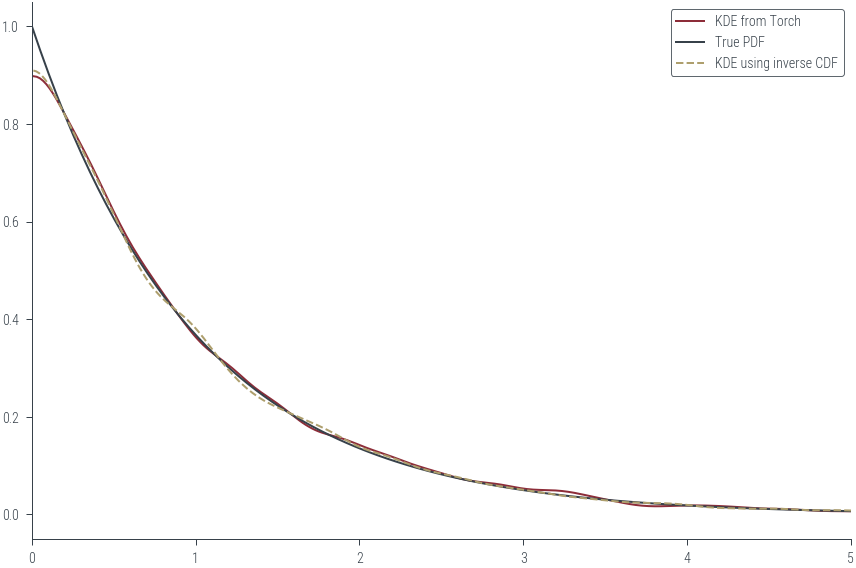

In [49]:
# Compare KDE to the true PDF

expon = torch.distributions.Exponential(rate=1)
x = torch.linspace(0, 5, 100)
pdf = expon.log_prob(x).exp()

# Sample from the distribution
torch.manual_seed(42)
random_numbers = expon.sample((10000,))

az.plot_kde(np.array(random_numbers), rug=False, label='KDE from Torch')

plt.plot(x, pdf, label='True PDF', color='C1')
plt.legend()

# Samples using inverse CDF method
u = torch.rand(10000)
samples = expon.icdf(u)
az.plot_kde(np.array(samples), rug=False, label='KDE using inverse CDF', plot_kwargs={"color":'C2', "ls":"--"})

plt.xlim(0, 5)


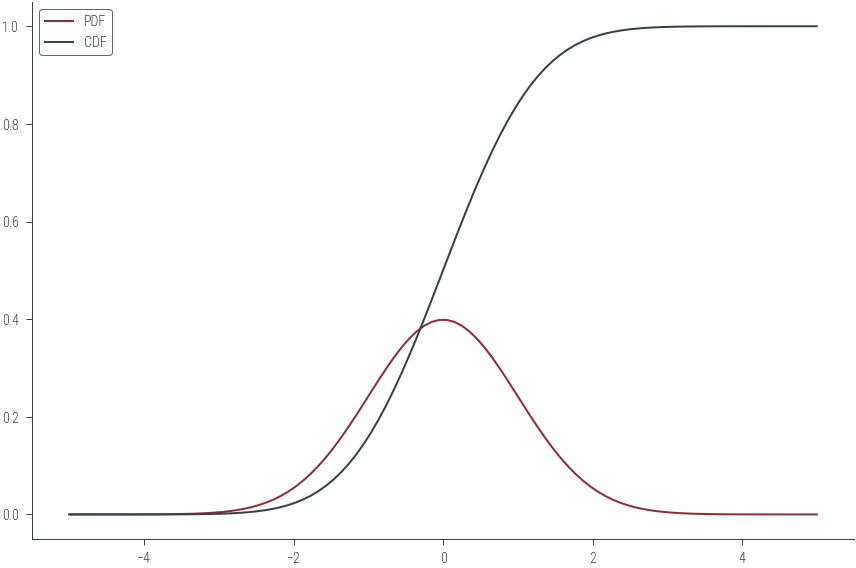

In [51]:
# Similarly generating samples from a normal distribution

normal = torch.distributions.Normal(loc=0, scale=1)
x = torch.linspace(-5, 5, 100)
pdf = normal.log_prob(x).exp()

cdf = normal.cdf(x)

plt.plot(x, pdf, label='PDF')
plt.plot(x, cdf, label='CDF')
plt.legend()

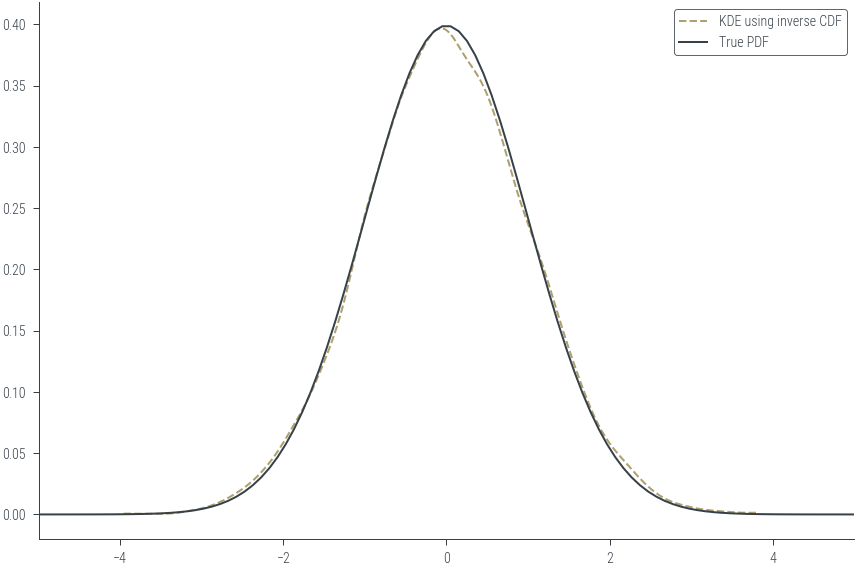

In [55]:
u = torch.rand(10000)
samples = normal.icdf(u)

az.plot_kde(np.array(samples), rug=False, label='KDE using inverse CDF', plot_kwargs={"color":'C2', "ls":"--"})

plt.plot(x, pdf, label='True PDF', color='C1')

plt.xlim(-5, 5)
plt.legend()

In [ ]:
def inverse_cdf(u, lam):
    return -torch.log(1 - u) / lam

def sample_exponential(n_samples, lam):
    u = torch.rand(n_samples)
    return inverse_cdf(u, lam)

In [22]:
class SimplePRNG:
    def __init__(self, seed=0):
        self.seed = seed
        self.a = 1664525
        self.c = 1013904223
        self.m = 2**32

    def random(self):
        self.seed = (self.a * self.seed + self.c) % self.m
        return self.seed / self.m

    def generate_N_random_numbers(self, N):
        random_numbers = []
        for _ in range(N):
            random_numbers.append(self.random())
        return random_numbers

# Usage
prng = SimplePRNG(seed=42)  # You can change the seed value
N = 10000  # Change N to the number of random numbers you want to generate
random_numbers = prng.generate_N_random_numbers(N)



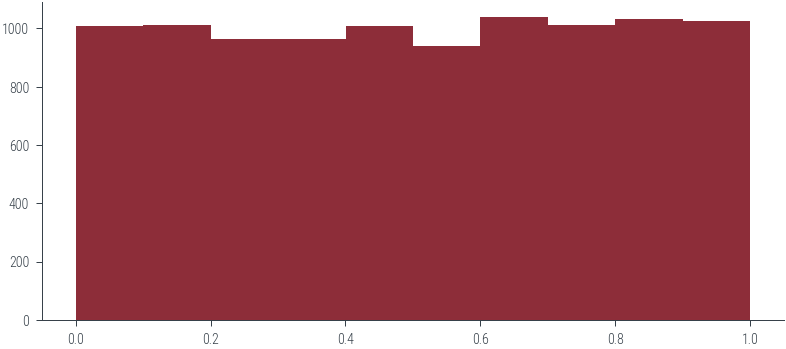

In [37]:
_ = plt.hist(random_numbers, bins=10)

<AxesSubplot:>

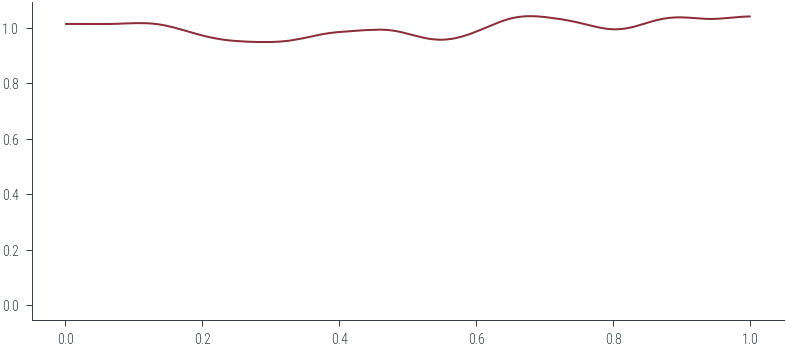

In [38]:
az.plot_kde(np.array(random_numbers), rug=False)

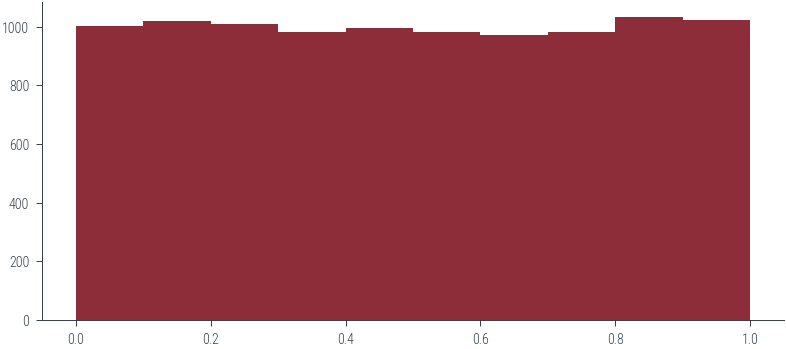

In [39]:
_ = plt.hist(np.random.rand(10000), bins=10)

<AxesSubplot:>

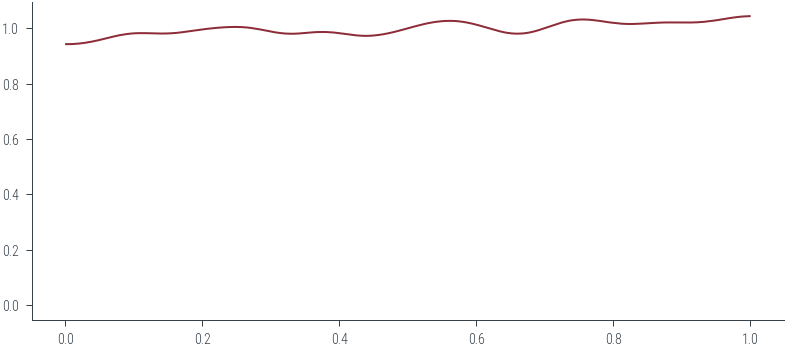

In [40]:
az.plot_kde(np.random.rand(10000), rug=False)

In [41]:
### Uniform (a, b)

a = -2
b = 2

random_numbers_a_b = a + (b - a) * np.array(random_numbers)


(array([1006., 1012.,  963.,  964., 1008.,  939., 1039., 1012., 1031.,
        1026.]),
 array([-1.99864224e+00, -1.59883546e+00, -1.19902869e+00, -7.99221917e-01,
        -3.99415144e-01,  3.91628593e-04,  4.00198402e-01,  8.00005174e-01,
         1.19981195e+00,  1.59961872e+00,  1.99942549e+00]),
 <BarContainer object of 10 artists>)

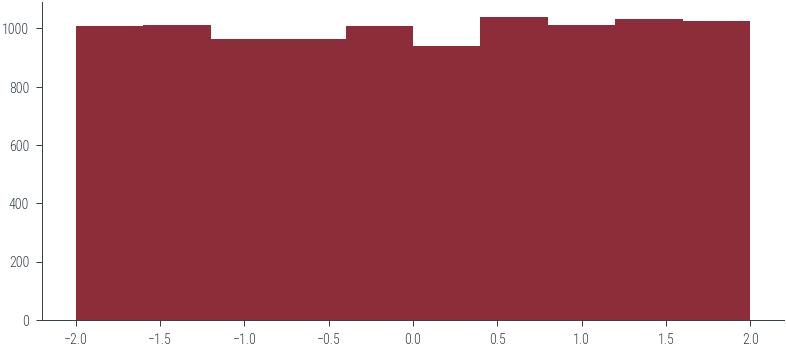

In [42]:
plt.hist(random_numbers_a_b, bins=10)